## Частина друга

Нехай все населення (N індивідів) ділиться на три групи: індивіди, які сприйнятливі до цієї хвороби, але здорові (susceptible) — S(t); заражені індивіди (infected) - I(t) (вони хворі самі і є носіями хвороби) і здорові індивіди, які мають імунітет до цієї хвороби (recovered) - R(t).
Приймемо, що:

\begin{equation}
S(t)+I(t)+R(t) = N
\end{equation}

Вважаємо, що коли кількість інфікованих перевищує певне фіксоване значення I∗, швидкість зміни кількості схильних до хвороби індивідів буде пропорційно кількості найсхильніших індивідів.

\begin{equation}
  \frac{dS}{dt} = -\alpha S
\end{equation}

Тепер, коли кожен схильний до хвороби індивід зрештою занедужує і стає інфекційним, то швидкість зміни інфікованих індивідів - це різниця за одиницю часу між захворілими і тими, хто одужує.

\begin{equation}
  \frac{dI}{dt} = -\alpha S - \beta I
\end{equation}

Постійні пропорційності α і β називають коефіцієнтами захворюваності та одужання відповідно.

Швидкість зміни кількості індивідів, що одужують:


\begin{equation}
  \frac{dR}{dt} = \beta I
\end{equation}

Щоб рішення відповідних рівнянь визначалися однозначно, необхідно задати початкові умови. Приймемо, що:
- $\alpha$ = 0.5
- $\beta$ = 0.3
- $N$ = 1000000
- $S(0)$ = 990000
- $I(0)$ = 7000
- $R(0)$ = 3000
- $t_0, t_f$ = 0, 25

Необхідно виконати:

1. Розв'язати диференціальне рівняння (2) та побудувати графік функції S(t)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

In [2]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0,tf = 0, 25

In [3]:
def dSdt(t, S):
    return -alpha * S

In [4]:
sol_sus = solve_ivp(dSdt, (t0, tf), [S], dense_output=True)
sol_sus

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000227B09BF340>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

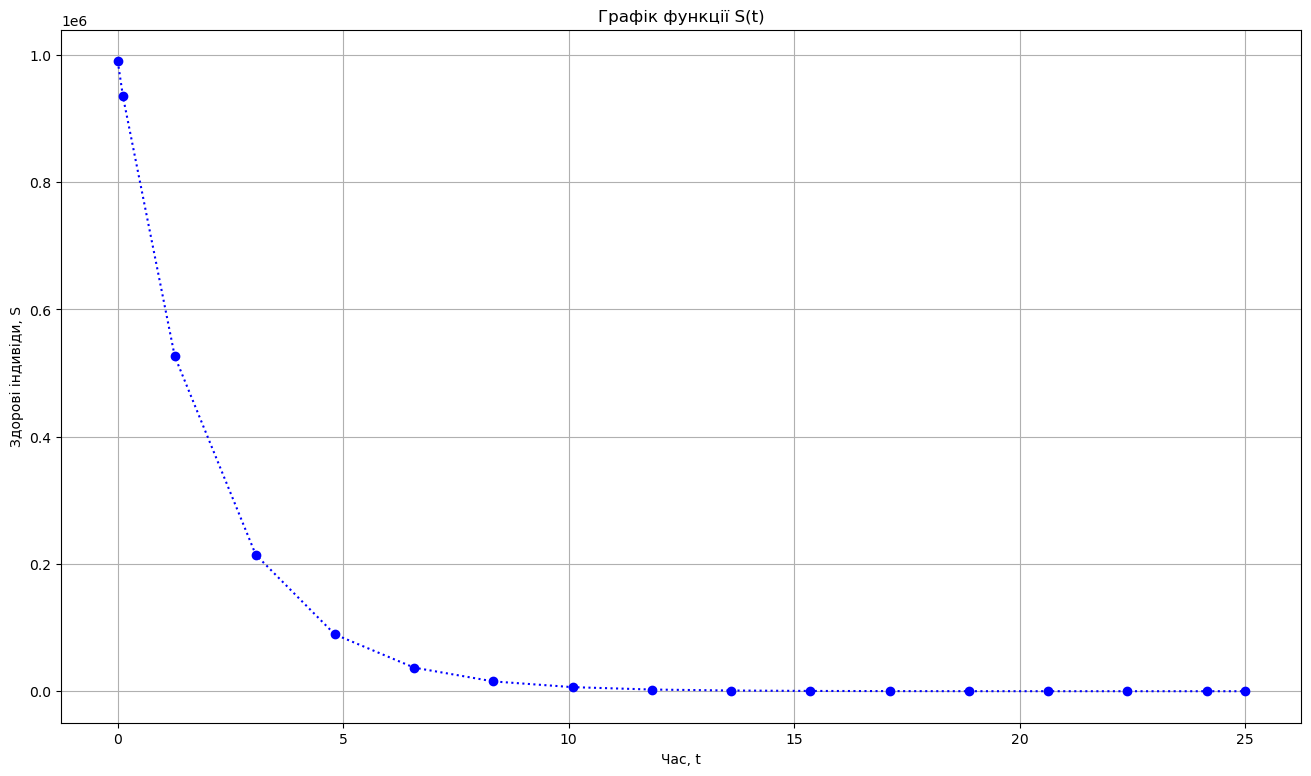

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(sol_sus.t, sol_sus.y[0], 'bo:')
plt.grid()
plt.title('Графік функції S(t)')
plt.ylabel('Здорові індивіди, S')
plt.xlabel('Час, t');

2. Розв'язати диференціальне рівняння (3) та побудувати графік функції I(t)

In [6]:
def dIdt(t, I):
    return alpha * sol_sus.sol(t) - beta * I

In [7]:
sol_inf = solve_ivp(dIdt, (t0, tf), [I], dense_output=True)
sol_inf

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000227B1F66CA0>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08334945, 446699.01195032, 319077.83026358,
        165571.99129925,  71966.74863389,  29712.58392708,
         12130.57394067,   5009.75291427,   2075.26330119,
          1367.85128541]])
 y_events: None

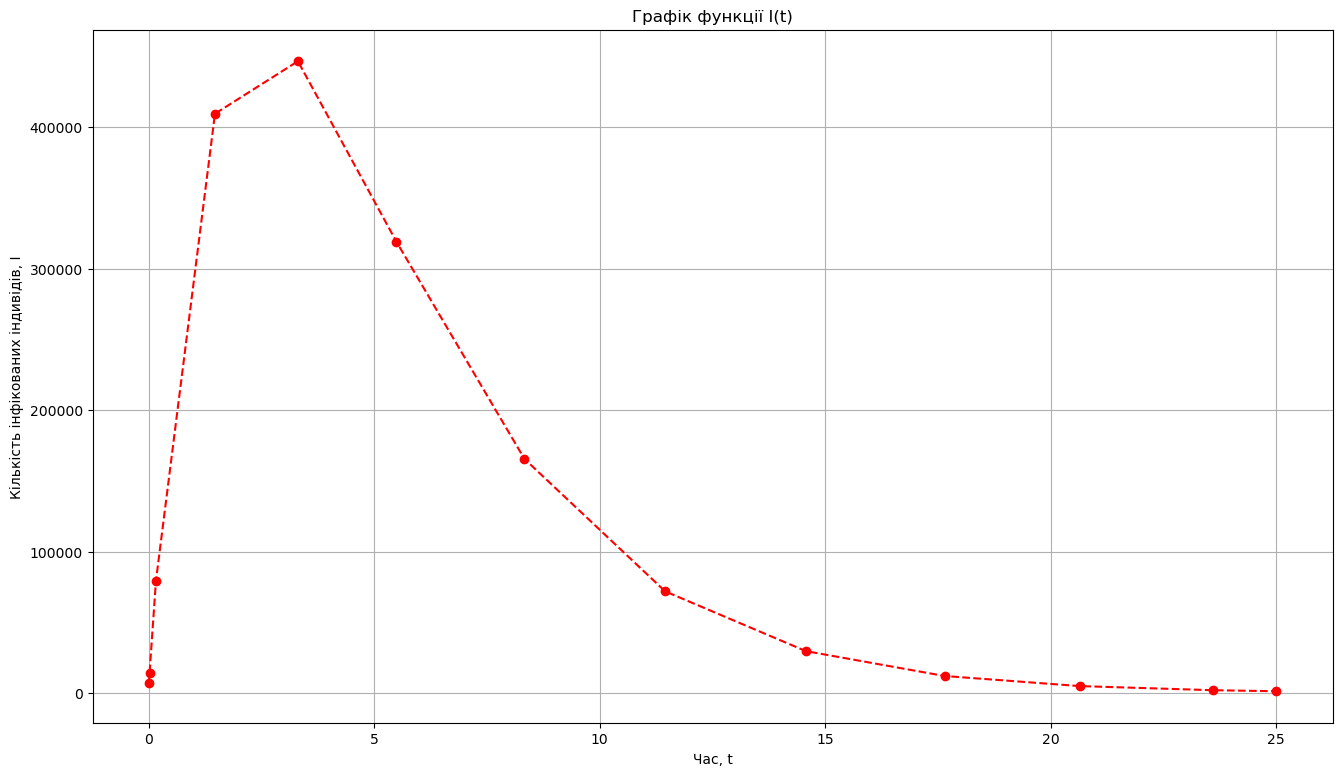

In [8]:
plt.figure(figsize=(16, 9))
plt.plot(sol_inf.t, sol_inf.y[0], 'ro--')
plt.grid()
plt.title('Графік функції I(t)')
plt.ylabel('Кількість інфікованих індивiдів, I')
plt.xlabel('Час, t');

In [9]:
sol_inf.y[0]

array([  7000.        ,  13960.24492701,  79326.36974353, 409578.08334945,
       446699.01195032, 319077.83026358, 165571.99129925,  71966.74863389,
        29712.58392708,  12130.57394067,   5009.75291427,   2075.26330119,
         1367.85128541])

In [10]:
sol_inf.sol(sol_inf.t)[0]

array([  7000.        ,  13960.24492701,  79326.36974353, 409578.08334945,
       446699.01195032, 319077.83026358, 165571.99129925,  71966.74863389,
        29712.58392708,  12130.57394067,   5009.75291427,   2075.26330119,
         1367.85128541])

3. Використовуючи рішення рівнянь (2) і (3), за допомогою рівняння (1), знайти рішення рівняння (4) (використовуйте інтерполяцію interp1d) та побудувати графік функції R(t)

In [11]:
sol_inf_interp = sol_inf.sol(sol_sus.t)
R = N - sol_sus.y[0] - sol_inf_interp[0]
R_i = interp1d(sol_sus.t, R, kind='linear')

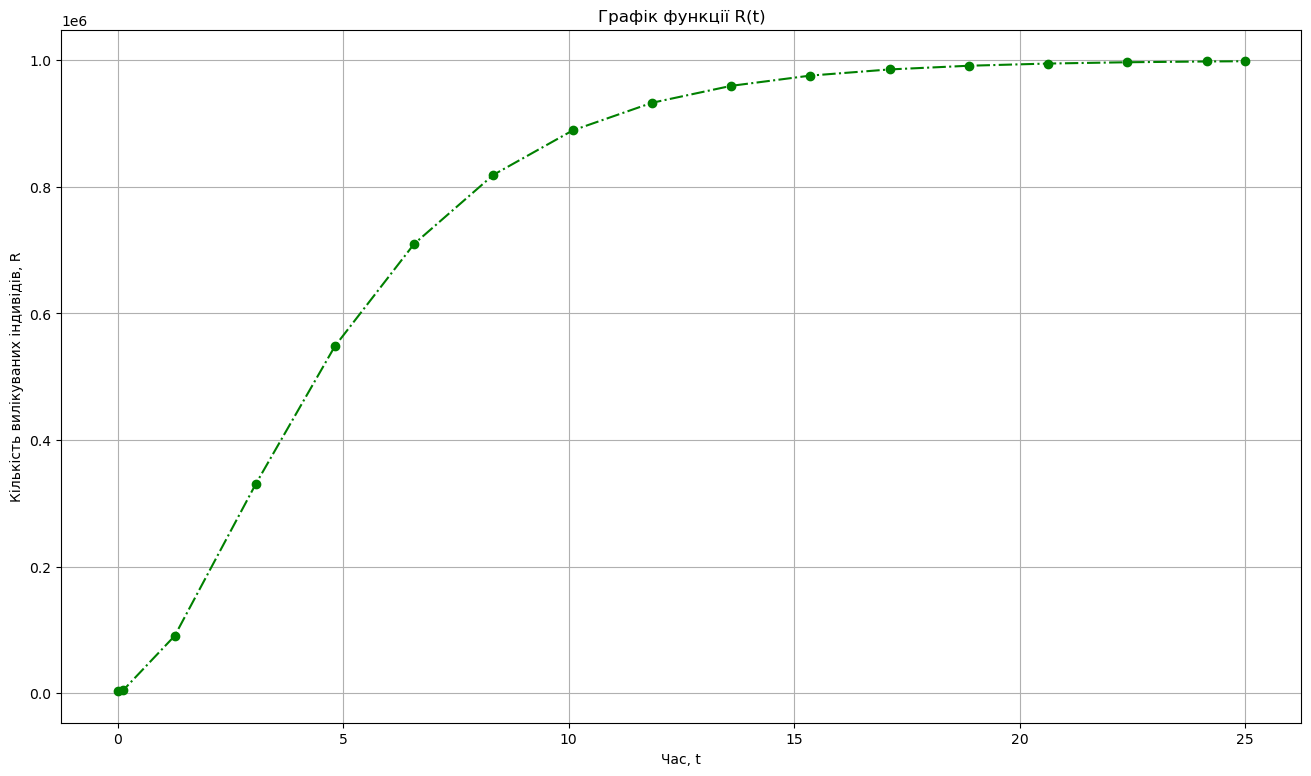

In [12]:
plt.figure(figsize=(16, 9))
plt.plot(sol_sus.t, R_i(sol_sus.t), 'go-.')
plt.grid()
plt.title('Графік функції R(t)')
plt.ylabel('Кількість вилікуваних індивiдів, R')
plt.xlabel('Час, t');

4. Побудувати всі три графіки S(t), I(t) і R(t) на одній області відображення

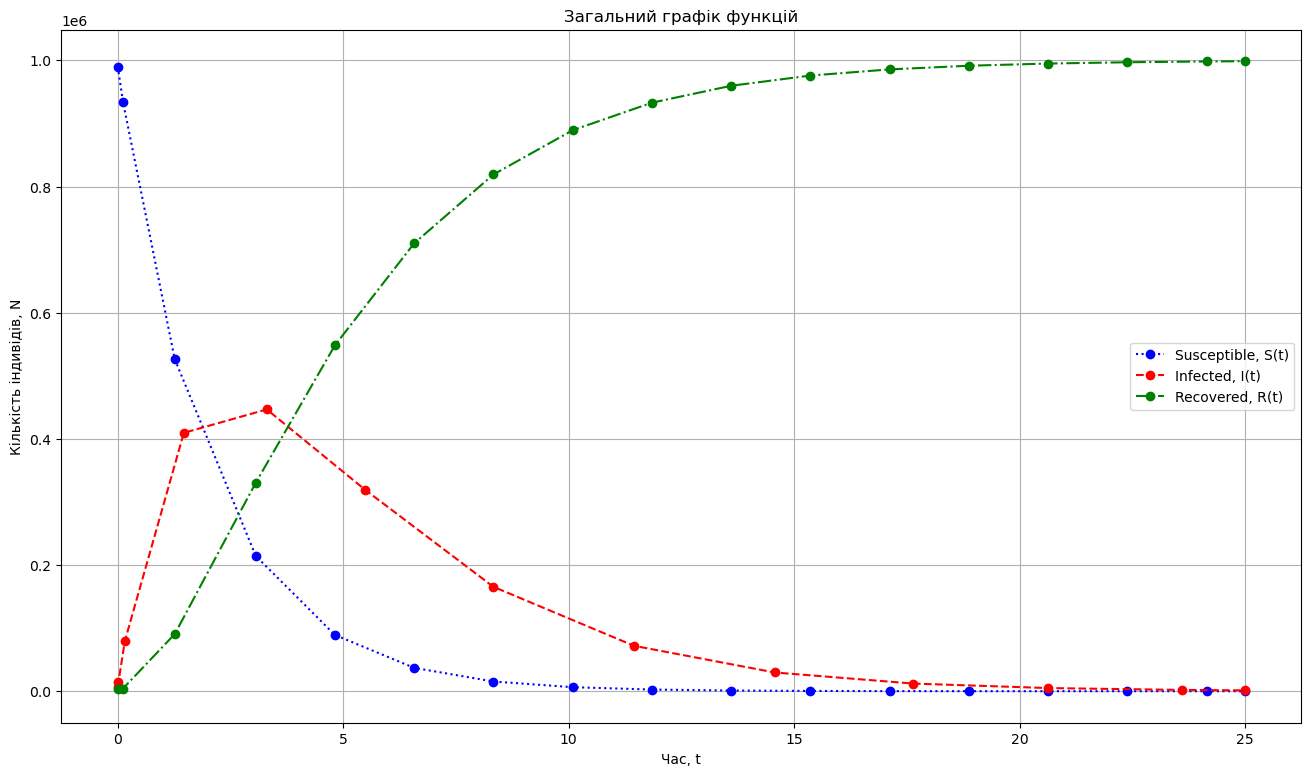

In [14]:
plt.figure(figsize=(16, 9))
plt.plot(sol_sus.t, sol_sus.y[0], 'bo:', label='Susceptible, S(t)')
plt.plot(sol_inf.t, sol_inf.y[0], 'ro--', label='Infected, I(t)')
plt.plot(sol_sus.t, R_i(sol_sus.t), 'go-.', label='Recovered, R(t)')
plt.legend()
plt.grid()
plt.title('Загальний графік функцій')
plt.ylabel('Кількість індивідів, N')
plt.xlabel('Час, t');